<a href="https://colab.research.google.com/github/utkarshg1/Test1/blob/main/StatsForecast_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting with statsforecast

In [7]:
%pip install statsforecast

In [8]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/AirPassengers.csv


In [9]:
import pandas as pd
df = pd.read_csv(url, parse_dates=["Month"])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
df = df.rename(columns={'Month': 'ds', 'Passengers': 'y'})
df["unique_id"] = "air_passengers"
df.head()

,ds,y,unique_id
0,1949-01-01,112,air_passengers
1,1949-02-01,118,air_passengers
2,1949-03-01,132,air_passengers
3,1949-04-01,129,air_passengers
4,1949-05-01,121,air_passengers


In [11]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

In [12]:
sf = StatsForecast(
    models = [AutoARIMA(season_length=12)],
    freq = "MS"
)

In [13]:
sf.fit(df)

StatsForecast(models=[AutoARIMA])

In [15]:
n_years = 3
n_months = n_years * 12
ypred = sf.predict(h=n_months, level=[95])
ypred = ypred.round(0)
ypred

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
0,air_passengers,1961-01-01,444.0,421.0,467.0
1,air_passengers,1961-02-01,418.0,390.0,446.0
2,air_passengers,1961-03-01,446.0,413.0,480.0
3,air_passengers,1961-04-01,488.0,451.0,526.0
4,air_passengers,1961-05-01,499.0,458.0,541.0
5,air_passengers,1961-06-01,562.0,517.0,607.0
6,air_passengers,1961-07-01,649.0,601.0,698.0
7,air_passengers,1961-08-01,633.0,582.0,685.0
8,air_passengers,1961-09-01,535.0,481.0,590.0
9,air_passengers,1961-10-01,488.0,431.0,545.0


In [16]:
historical_data = df[["y", "ds"]].set_index("ds")
historical_data.head()

,y
ds,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [17]:
forecast_data = ypred[["AutoARIMA", "ds"]].set_index("ds")
forecast_data

,AutoARIMA
ds,
1961-01-01,444.0
1961-02-01,418.0
1961-03-01,446.0
1961-04-01,488.0
1961-05-01,499.0
1961-06-01,562.0
1961-07-01,649.0
1961-08-01,633.0
1961-09-01,535.0


In [18]:
import matplotlib.pyplot as plt

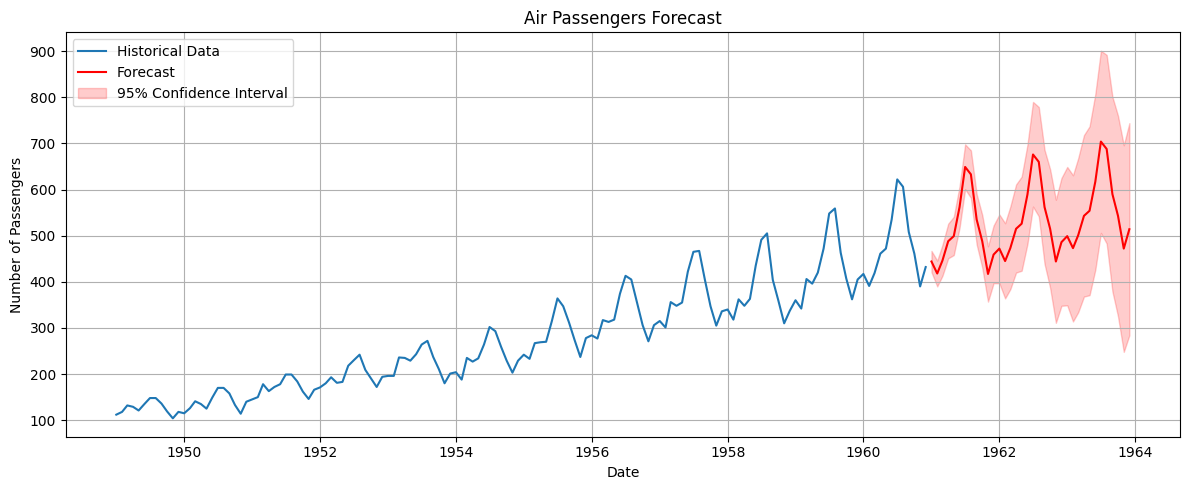

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(historical_data.index, historical_data['y'], label='Historical Data')
plt.plot(forecast_data.index, forecast_data['AutoARIMA'], label='Forecast', color='red')
plt.fill_between(
        forecast_data.index,
        ypred['AutoARIMA-lo-95'],
        ypred['AutoARIMA-hi-95'],
        color='red',
        alpha=0.2,
        label='95% Confidence Interval'
)
plt.title('Air Passengers Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()